In [1]:
import numpy as np
from tensorflow.keras.layers import Input, LSTM, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy, mean_squared_error
from tensorflow.keras.models import Sequential

In [2]:
X = np.random.rand(1000000,10,1)

In [3]:
y = np.random.randint(0, 10, size=(1000000,1))

In [4]:
X.shape, y.shape

((1000000, 10, 1), (1000000, 1))

In [5]:
print(y)

[[8]
 [6]
 [6]
 ...
 [0]
 [4]
 [9]]


In [6]:
model = Sequential()
model.add(SimpleRNN(10, input_shape = (10,1), activation='tanh', return_sequences="False"))
model.add(Dense(1, activation='linear'))


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=mean_squared_error, metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X, y, validation_split=0.2,epochs=50, batch_size=32)

Epoch 1/50
25000/25000 [==============================] - 91s 4ms/step - loss: 8.3672 - accuracy: 0.0999 - val_loss: 8.2373 - val_accuracy: 0.1001
Epoch 2/50
25000/25000 [==============================] - 46s 2ms/step - loss: 8.2476 - accuracy: 0.0999 - val_loss: 8.2361 - val_accuracy: 0.1001
Epoch 3/50
25000/25000 [==============================] - 43s 2ms/step - loss: 8.2471 - accuracy: 0.0999 - val_loss: 8.2403 - val_accuracy: 0.1001
Epoch 4/50
25000/25000 [==============================] - 43s 2ms/step - loss: 8.2475 - accuracy: 0.0999 - val_loss: 8.2411 - val_accuracy: 0.1001
Epoch 5/50
25000/25000 [==============================] - 44s 2ms/step - loss: 8.2472 - accuracy: 0.0999 - val_loss: 8.2360 - val_accuracy: 0.1001
Epoch 6/50
25000/25000 [==============================] - 43s 2ms/step - loss: 8.2472 - accuracy: 0.0999 - val_loss: 8.2362 - val_accuracy: 0.1001
Epoch 7/50
25000/25000 [==============================] - 45s 2ms/step - loss: 8.2471 - accuracy: 0.0999 - val_loss: 8

In [9]:
model.save("RNN_Vanishing_simple.h5")

In [13]:
import matplotlib.pyplot as plt 
plt.plot(model['loss'])
plt.plot(model['val_loss'])
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

TypeError: 'Sequential' object is not subscriptable

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
from keras.models import load_model
load_model('RNN_Vanishing_simple.h5')


In [14]:
x_test = np.random.rand(20,10,1)
y_test = np.random.randint(0,10,size=(20,1))

In [15]:
predict = model.predict(x_test)

In [16]:
predict, y_test

(array([[[4.5399656],
         [4.55817  ],
         [4.5504346],
         [4.550281 ],
         [4.550481 ],
         [4.5502415],
         [4.5505342],
         [4.5501714],
         [4.550603 ],
         [4.550099 ]],
 
        [[4.5248103],
         [4.543266 ],
         [4.550358 ],
         [4.550381 ],
         [4.5503535],
         [4.550385 ],
         [4.550338 ],
         [4.5503945],
         [4.550328 ],
         [4.5504255]],
 
        [[4.533065 ],
         [4.5514197],
         [4.550437 ],
         [4.550286 ],
         [4.5504646],
         [4.550264 ],
         [4.5505033],
         [4.550215 ],
         [4.5505457],
         [4.5501494]],
 
        [[4.532558 ],
         [4.552067 ],
         [4.550419 ],
         [4.5503106],
         [4.550439 ],
         [4.550277 ],
         [4.5504646],
         [4.5502553],
         [4.550517 ],
         [4.5502048]],
 
        [[4.5330825],
         [4.554866 ],
         [4.550422 ],
         [4.550308 ],
         [4.5504527]

In [17]:
inputs = Input(shape=(10,1))

In [18]:
lstm1 = LSTM(64, return_sequences=True)(inputs)

# Add more LSTM layers to the RNN
lstm2 = LSTM(64, return_sequences=True)(lstm1)
lstm3 = LSTM(64, return_sequences=True)(lstm2)
lstm4 = LSTM(64, return_sequences=False)(lstm3)

# Add a Dense layer to the RNN to predict the output
outputs = Dense(1, activation='softmax')(lstm4)


In [19]:
# Define the model and compile it
model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=['accuracy'])

In [20]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_2 (LSTM)               (None, 10, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable

In [25]:
history = model2.fit(X, y, epochs=5, validation_split=0.2 ,batch_size=64)

Epoch 1/5
12500/12500 [==============================] - 366s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1001
Epoch 2/5
12500/12500 [==============================] - 358s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1001
Epoch 3/5
12500/12500 [==============================] - 326s 26ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1001
Epoch 4/5
12500/12500 [==============================] - 286s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1001
Epoch 5/5
12500/12500 [==============================] - 283s 23ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1001


In [26]:
model2.save("LSTM_simple.h5") 

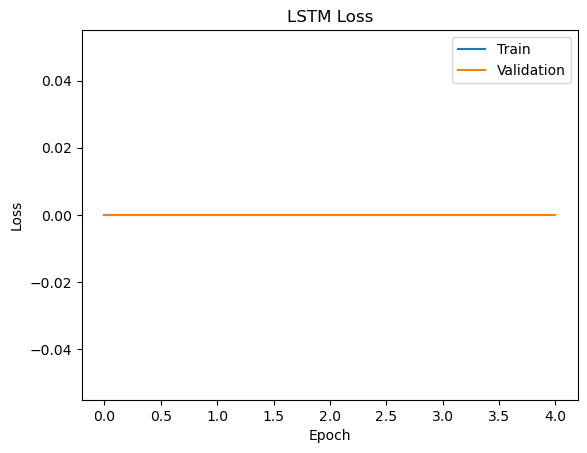

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

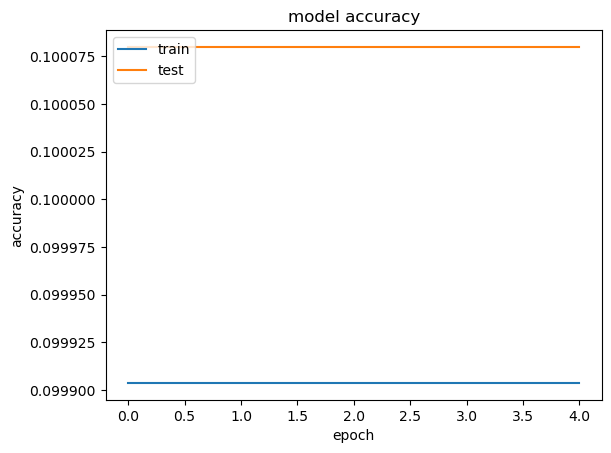

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [108]:
predict = model2.predict(x_test)

In [110]:
x_test.shape

(20, 10, 1)

In [109]:
predict

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)